<a href="https://colab.research.google.com/github/jeremontoya155/Algoritmo_Clasificacion_Montoya/blob/main/Montoya_Analisis_Clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



 Consigna: 
Implementar al menos uno de los algoritmos de clasificación vistos en la sesión de hoy con el dataset propuesto para el proyecto final del curso. 



In [21]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#Importar la regresion logistica
from sklearn.linear_model import LogisticRegression
#Para matriz de confusion  
#Calculamos la precison
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score,f1_score,roc_auc_score

In [26]:
df=pd.read_csv("/content/dataset-of-00s.csv")
df.head()



,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1


In [20]:
print(df.shape)


(5872, 15)


In [3]:
#Descripcion  de nuestra base
df.head()


,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1


In [4]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5872.000000,5.872000e+03,5872.000000,5872.000000,5872.000000,5872.000000
mean,0.542931,0.694511,5.276396,-7.449258,0.645095,0.092360,0.214374,0.150917,0.196141,0.482262,121.613018,2.581706e+05,3.913999,40.734295,11.056880,0.500000
std,0.190003,0.237792,3.564153,5.102543,0.478525,0.094997,0.296511,0.301452,0.161965,0.254567,30.179885,1.395341e+05,0.404280,20.245637,5.758186,0.500043
min,0.058800,0.000348,0.000000,-47.327000,0.000000,0.022400,0.000000,0.000000,0.019300,0.000000,46.755000,1.592000e+04,0.000000,0.000000,1.000000,0.000000
25%,0.416000,0.567000,2.000000,-8.315000,0.000000,0.036175,0.004553,0.000000,0.093700,0.278000,96.984000,2.068130e+05,4.000000,27.507507,9.000000,0.000000
50%,0.556000,0.744000,5.000000,-6.041500,1.000000,0.052700,0.060300,0.000022,0.131000,0.486000,119.999000,2.380065e+05,4.000000,36.037160,10.000000,0.500000
75%,0.681000,0.885000,8.000000,-4.562500,1.000000,0.107000,0.312000,0.047275,0.263000,0.687000,141.495250,2.791600e+05,4.000000,47.889570,12.000000,1.000000
max,0.986000,0.999000,11.000000,1.137000,1.000000,0.950000,0.996000,0.998000,0.987000,0.982000,213.233000,4.170227e+06,5.000000,262.615400,169.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             5872 non-null   object 
 1   artist            5872 non-null   object 
 2   uri               5872 non-null   object 
 3   danceability      5872 non-null   float64
 4   energy            5872 non-null   float64
 5   key               5872 non-null   int64  
 6   loudness          5872 non-null   float64
 7   mode              5872 non-null   int64  
 8   speechiness       5872 non-null   float64
 9   acousticness      5872 non-null   float64
 10  instrumentalness  5872 non-null   float64
 11  liveness          5872 non-null   float64
 12  valence           5872 non-null   float64
 13  tempo             5872 non-null   float64
 14  duration_ms       5872 non-null   int64  
 15  time_signature    5872 non-null   int64  
 16  chorus_hit        5872 non-null   float64


In [42]:
lista=list(df.keys())
lista.remove("track")
lista.remove("artist")
lista.remove("uri")
lista.remove("target")
print(lista)


['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit', 'sections']


In [40]:
#Vemos la distribucion del target
def muestreo_general(listado,dfE):
  for i in listado:
    extra=dfE.groupby("target")[i].sum().plot(kind="bar",legend="Reverse")
    plt.show(extra)


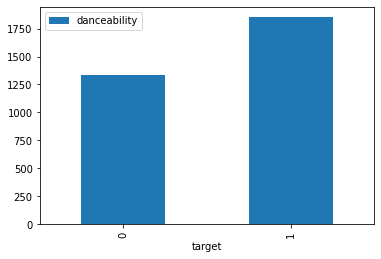

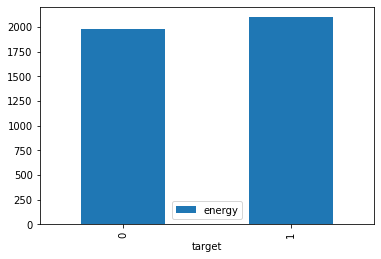

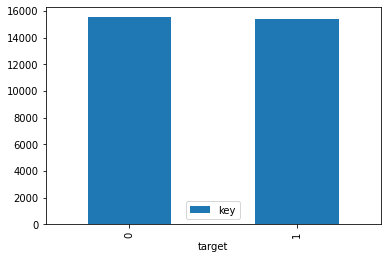

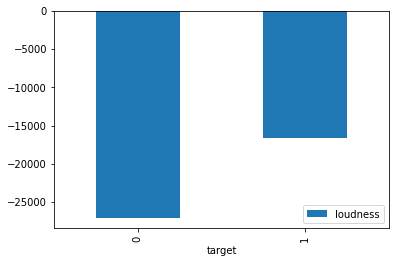

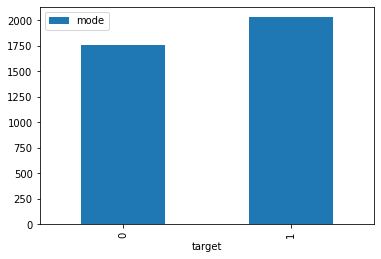

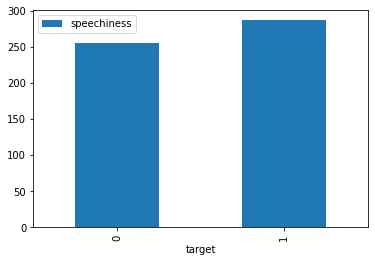

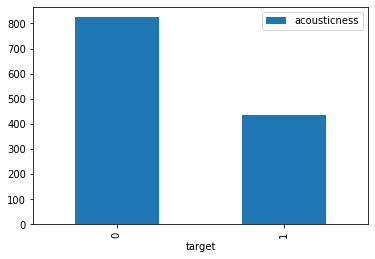

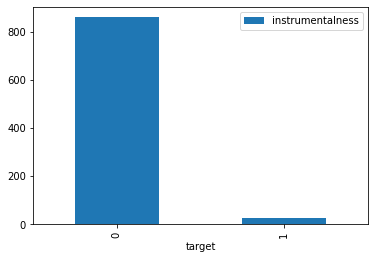

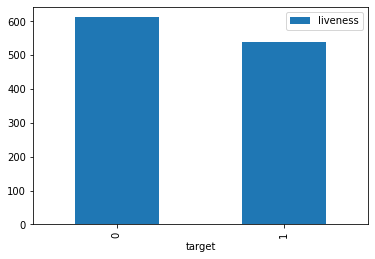

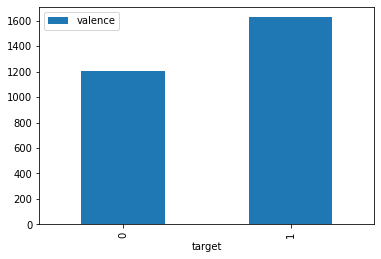

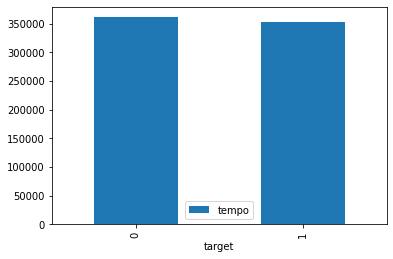

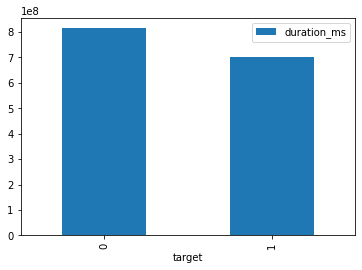

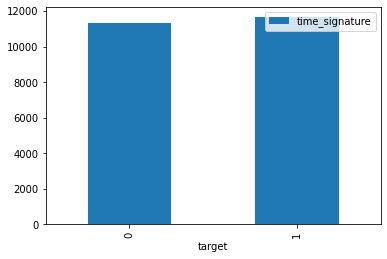

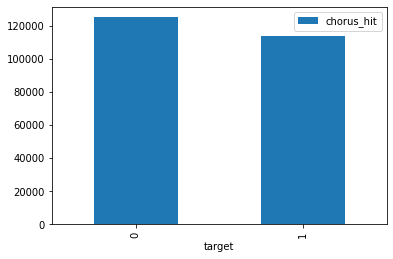

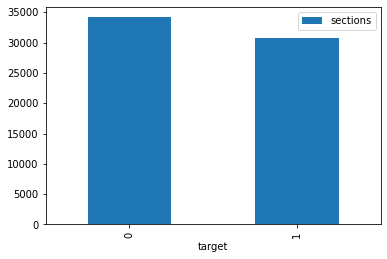

In [44]:
#El grafico expresado nos mostrara el balance  entre el valor 0 y 1 del target
muestreo_general(lista,df)

In [7]:
Y=df["target"]
#Eliminamos las columnas que no vamos a usar 
df.pop("track")
df.pop("artist")
df.pop("uri")
df.pop("target")
X=df
#Verificamos que este correcto esto
print(Y.keys())
print(X.keys())

RangeIndex(start=0, stop=5872, step=1)
Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'chorus_hit', 'sections'],
      dtype='object')


In [8]:
#Entrenamos el modelo
X_train,X_test,Y_train,Y_test=train_test_split(X,Y)

In [9]:
#Importar la regresion logistica
algoritmo=LogisticRegression()
#Entrenamos el modelo 
algoritmo.fit(X_train,Y_train)

LogisticRegression()

In [10]:
#Por ultimo realizamos una prediccion
y_pred=algoritmo.predict(X_test)
#Verifico si las predicciones fueron correctas mediante la matriz de confusion 
matriz=confusion_matrix(Y_test,y_pred)
print(matriz)

[[439 294]
 [264 471]]


In [11]:
#Calculo de precision
precision=precision_score(Y_test,y_pred)
print(precision) 

0.615686274509804


Exactitud de modelo

Es el número de predicciones correctas realizadas por el modelo por el número total de registros.

In [12]:
#Exactitud del modelo
exactitud=accuracy_score(Y_test,y_pred)
print(exactitud*100,"%")

61.98910081743869 %


In [13]:
#Calculo del puntaje F1(combinacion entre precision y sensibilidad)
puntaje=f1_score(Y_test,y_pred)
print(puntaje)

0.628


Curva roc
La elección se realiza mediante la comparación del área bajo la curva (AUC) de ambas pruebas. Esta área posee un valor comprendido entre 0,5 y 1, donde 1 representa un valor diagnóstico perfecto y 0,5 es una prueba sin capacidad discriminatoria diagnóstica

In [15]:
#Curva roc - aux del modelo()
roc_auc=roc_auc_score(Y_test,y_pred)
print(roc_auc)

0.6198624606732188
